In [40]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl



def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [41]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [42]:
np.random.seed(42)
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

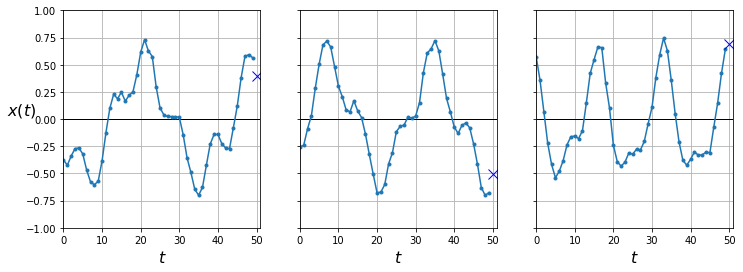

In [43]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
# save_fig("time_series_plot")
plt.show()


### Computing Some Baselines
Naive predictions (just predict the last observed value):

In [67]:
y_pred = X_valid[:, -1]
np.mean((y_valid - y_pred)**2)

0.47568396

In [44]:
np.random.seed(42)
tf.set_random_seed(42)

# tensorflow.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 3s 382us/step - loss: 0.0128 - val_loss: 0.0109
Epoch 2/20
7000/7000 [==============================] - 2s 307us/step - loss: 0.0114 - val_loss: 0.0109
Epoch 3/20
7000/7000 [==============================] - 2s 310us/step - loss: 0.0114 - val_loss: 0.0110
Epoch 4/20
7000/7000 [==============================] - 2s 306us/step - loss: 0.0114 - val_loss: 0.0109
Epoch 5/20
7000/7000 [==============================] - 2s 307us/step - loss: 0.0114 - val_loss: 0.0109
Epoch 6/20
7000/7000 [==============================] - 2s 309us/step - loss: 0.0114 - val_loss: 0.0109
Epoch 7/20
7000/7000 [==============================] - 2s 336us/step - loss: 0.0114 - val_loss: 0.0110
Epoch 8/20
7000/7000 [==============================] - 2s 318us/step - loss: 0.0114 - val_loss: 0.0110
Epoch 9/20
7000/7000 [==============================] - 2s 311us/step - loss: 0.0114 - val_loss: 0.0110
Epoch 10/20
7000

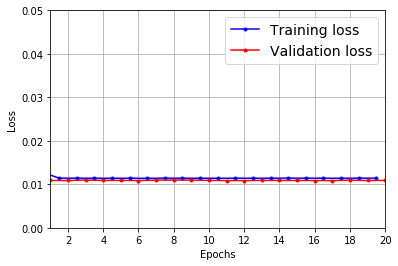

In [45]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [46]:

model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 95us/step


0.010894205510616303

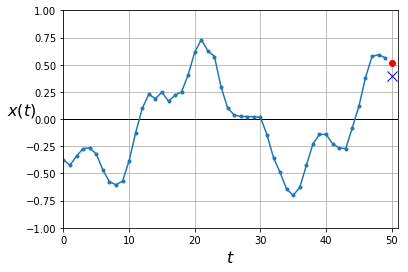

In [47]:

y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()


In [48]:
y_pred[0,0]

0.51578605

In [49]:
np.random.seed(42)
tf.set_random_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 6s 912us/step - loss: 0.0120 - val_loss: 0.0047
Epoch 2/20
7000/7000 [==============================] - 6s 789us/step - loss: 0.0037 - val_loss: 0.0032
Epoch 3/20
7000/7000 [==============================] - 6s 787us/step - loss: 0.0032 - val_loss: 0.0029
Epoch 4/20
7000/7000 [==============================] - 5s 783us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 5/20
7000/7000 [==============================] - 6s 804us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 6/20
7000/7000 [==============================] - 6s 819us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 7/20
7000/7000 [==============================] - 6s 787us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 8/20
7000/7000 [==============================] - 5s 785us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 9/20
7000/7000 [==============================] - 6s 800us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 10/20
7000

In [50]:
model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 247us/step


0.0027512849159538745

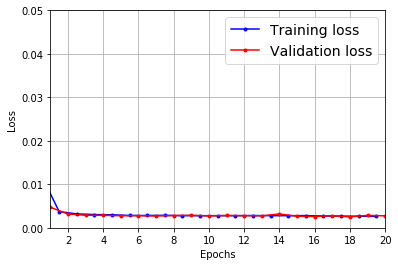

In [51]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

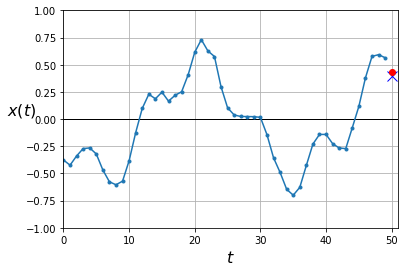

In [52]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [53]:
np.random.seed(42)
tf.set_random_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))


Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 5s 690us/step - loss: 0.0170 - val_loss: 0.0045
Epoch 2/20
7000/7000 [==============================] - 4s 556us/step - loss: 0.0040 - val_loss: 0.0033
Epoch 3/20
7000/7000 [==============================] - 4s 558us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 4/20
7000/7000 [==============================] - 4s 552us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 5/20
7000/7000 [==============================] - 4s 555us/step - loss: 0.0032 - val_loss: 0.0029
Epoch 6/20
7000/7000 [==============================] - 4s 560us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 7/20
7000/7000 [==============================] - 4s 557us/step - loss: 0.0031 - val_loss: 0.0026
Epoch 8/20
7000/7000 [==============================] - 4s 556us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 9/20
7000/7000 [==============================] - 4s 611us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 10/20
7000

In [54]:
model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 165us/step


0.0026147532016038894

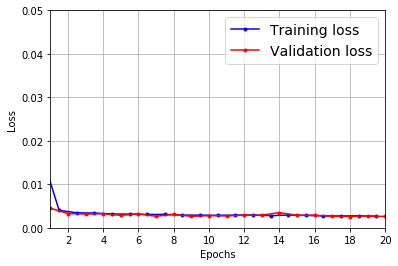

In [55]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

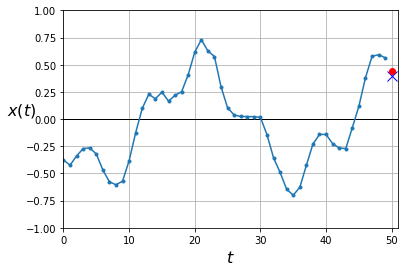

In [56]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

## Forecasting Several Steps Ahead

In [57]:
tf.set_random_seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

In [58]:
Y_pred.shape

(1, 10, 1)

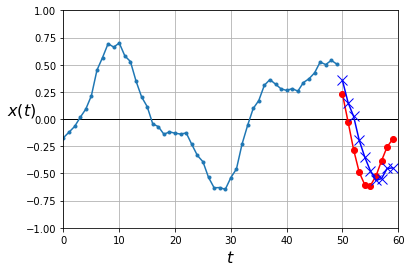

In [59]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "ro-")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bx-", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])

plot_multiple_forecasts(X_new, Y_new, Y_pred)
# save_fig("forecast_ahead_plot")
plt.show()


Now let's create an RNN that predicts all 10 next values at once:

In [69]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:]

In [70]:
np.random.seed(42)
tf.set_random_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
#     keras.layers.BatchNaormalization(),
    keras.layers.SimpleRNN(20, return_sequences=True),
#     keras.layers.BatchNormalization(),
    keras.layers.TimeDistributed(keras.layers.Dense(1)),
    keras.layers.Lambda(lambda Y_pred: Y_pred[:, -10:])
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 5s 676us/step - loss: 0.0524 - val_loss: 0.0389
Epoch 2/20
7000/7000 [==============================] - 4s 536us/step - loss: 0.0322 - val_loss: 0.0317
Epoch 3/20
7000/7000 [==============================] - 4s 538us/step - loss: 0.0252 - val_loss: 0.0225
Epoch 4/20
7000/7000 [==============================] - 4s 568us/step - loss: 0.0219 - val_loss: 0.0202
Epoch 5/20
7000/7000 [==============================] - 4s 553us/step - loss: 0.0207 - val_loss: 0.0218
Epoch 6/20
7000/7000 [==============================] - 4s 540us/step - loss: 0.0193 - val_loss: 0.0192
Epoch 7/20
7000/7000 [==============================] - 4s 541us/step - loss: 0.0190 - val_loss: 0.0178
Epoch 8/20
7000/7000 [==============================] - 4s 538us/step - loss: 0.0184 - val_loss: 0.0186
Epoch 9/20
7000/7000 [==============================] - 4s 537us/step - loss: 0.0180 - val_loss: 0.0191
Epoch 10/20
7000

In [71]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[:, -10:, :]

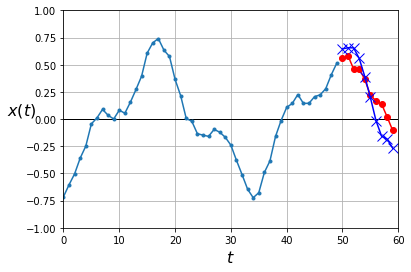

In [72]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [75]:
def last_10_time_steps_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -10:], Y_pred[:, -10:])


In [77]:
np.random.seed(42)
tf.set_random_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
#     keras.layers.BatchNaormalization(),
    keras.layers.LSTM(20, return_sequences=True),
#     keras.layers.BatchNormalization(),
    keras.layers.TimeDistributed(keras.layers.Dense(1)),
    keras.layers.Lambda(lambda Y_pred: Y_pred[:, -10:])
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 18s 3ms/step - loss: 0.0784 - val_loss: 0.0670
Epoch 2/20
7000/7000 [==============================] - 16s 2ms/step - loss: 0.0600 - val_loss: 0.0530
Epoch 3/20
7000/7000 [==============================] - 16s 2ms/step - loss: 0.0378 - val_loss: 0.0295
Epoch 4/20
7000/7000 [==============================] - 16s 2ms/step - loss: 0.0263 - val_loss: 0.0237
Epoch 5/20
7000/7000 [==============================] - 16s 2ms/step - loss: 0.0240 - val_loss: 0.0225
Epoch 6/20
7000/7000 [==============================] - 16s 2ms/step - loss: 0.0223 - val_loss: 0.0210
Epoch 7/20
7000/7000 [==============================] - 16s 2ms/step - loss: 0.0223 - val_loss: 0.0211
Epoch 8/20
7000/7000 [==============================] - 16s 2ms/step - loss: 0.0212 - val_loss: 0.0198
Epoch 9/20
7000/7000 [==============================] - 16s 2ms/step - loss: 0.0208 - val_loss: 0.0213
Epoch 10/20
7000/7000 [==

In [78]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[:, -10:, :]

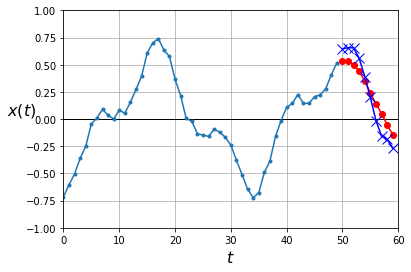

In [79]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()